In [66]:
import sys
import importlib
# Make imports work
sys.path.insert(0, '../')

In [67]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mhealth_anomaly_detection import anomaly_detection
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import load_refs as lr
importlib.reload(anomaly_detection)

<module 'mhealth_anomaly_detection.anomaly_detection' from '/Users/akre96/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/anomaly_detection.py'>

In [68]:
# Load ad results
EXPERIMENTS = [
    'exp01',
    'exp02',
    'exp03'
]
N_SUBJECTS = 100
DAYS_OF_DATA = 90

results_list = []
for exp in EXPERIMENTS:
    fname = f'{exp}_nSubjects-{N_SUBJECTS}_nDays-{DAYS_OF_DATA}.csv'
    fpath = Path('../cache', fname)
    res = pd.read_csv(fpath)
    res['experiment'] = exp
    results_list.append(res)
data_df = pd.concat(results_list).fillna(-1)

anomaly_detector_cols = [d for d in data_df.columns if d.endswith("_anomaly")]
groupby_cols = [
    'subject_id',
    'correlation_type',
    'window_size',
    'n_features',
    'anomaly_freq',
    'history_type',
    'experiment'
]

In [69]:
performance_df = anomaly_detection.performance_metrics(
    data=data_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)

print('Accuracy')
print(performance_df.groupby('model').accuracy.describe().round(3))
print('Sensitivity')
print(performance_df.groupby('model').sensitivity.describe().round(3))
print('Specificity')
print(performance_df.groupby('model').specificity.describe().round(3))

100%|██████████| 10800/10800 [00:29<00:00, 366.72it/s]


Accuracy
               count   mean    std    min    25%    50%    75%    max
model                                                                
NMF          10800.0  0.817  0.174  0.500  0.778  0.900  0.944  1.000
PCA          10800.0  0.830  0.181  0.467  0.769  0.906  0.956  1.000
RollingMean  10800.0  0.823  0.180  0.489  0.772  0.906  0.944  1.000
svm          10800.0  0.783  0.171  0.367  0.611  0.856  0.922  0.967
Sensitivity
               count   mean    std  min    25%    50%    75%  max
model                                                            
NMF          10800.0  0.183  0.207  0.0  0.040  0.083  0.333  1.0
PCA          10800.0  0.277  0.277  0.0  0.045  0.167  0.438  1.0
RollingMean  10800.0  0.257  0.271  0.0  0.045  0.167  0.333  1.0
svm          10800.0  0.030  0.066  0.0  0.000  0.000  0.000  0.5
Specificity
               count   mean    std    min    25%    50%    75%  max
model                                                              
NMF          10

In [70]:
distance_df = anomaly_detection.distance_real_to_detected_anomaly(
    data=data_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)

100%|██████████| 10800/10800 [00:39<00:00, 273.97it/s]


In [88]:

distance_df.groupby(['model']).distance.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
NMF,125000.0,19.510,17.513,0.0,6.0,14.0,28.0,76.0
PCA,131000.0,19.235,18.293,0.0,4.0,14.0,29.0,82.0
RollingMean,138900.0,21.911,19.368,0.0,6.0,16.0,35.0,81.0
SVM,109041.0,12.124,12.787,0.0,3.0,8.0,18.0,86.0


In [73]:
palette = lr.get_colors('../lib/colors.json')
model_order = [
    'RollingMean',
    'PCA',
    'NMF',
    'SVM'
]

In [74]:
distance_df.loc[distance_df.history_type == -1, 'history_type'] = 'history_all_28'
distance_df.loc[distance_df.correlation_type == -1, 'corelation_type'] = 'Independent'
distance_df.loc[distance_df.model == 'svm', 'model'] = 'SVM'

performance_df.loc[performance_df.history_type == -1, 'history_type'] = 'history_all_28'
performance_df.loc[performance_df.correlation_type == -1, 'corelation_type'] = 'Independent'
performance_df.loc[performance_df.model == 'svm', 'model'] = 'SVM'

count    mean     std  min  25%   50%   75%   max
model       anomaly_freq                                                     
NMF         2             79600.0  17.617  14.643  0.0  6.0  14.0  26.0  76.0
            7             29200.0  29.839  21.618  0.0  9.0  28.0  49.0  72.0
            14            11600.0  11.664  13.530  0.0  0.0  13.5  15.0  60.0
            28             4600.0   6.500  11.505  0.0  0.0   0.0   1.0  38.0
PCA         2             82100.0  20.257  17.940  0.0  6.0  16.0  30.0  82.0
            7             28700.0  23.899  20.037  0.0  7.0  21.0  35.0  70.0
            14            14100.0   9.525  11.964  0.0  0.0   1.0  14.0  42.0
            28             6100.0   5.984  11.174  0.0  0.0   0.0   1.0  28.0
RollingMean 2             91500.0  24.858  19.503  0.0  8.0  20.0  39.0  81.0
            7             28900.0  19.540  18.779  0.0  7.0  14.0  28.0  70.0
            14            13200.0  15.030  15.380  0.0  0.0  14.0  28.0  45.0
            28             5300.0   1.094   4.495  0.0  0.0   0.0   0.0  26.0
SVM         2             75782.0  11.606  12.716  0.0  2.0   7.0  17.0  86.0
            7             20093.0  13.456  13.292  0.0  4.0  10.0  19.0  82.0
            14             9369.0  13.350  12.541  0.0  5.0   9.0  19.0  75.0
            28             3797.0  12.407  11.265  0.0  5.0   9.0  16.0  61.0

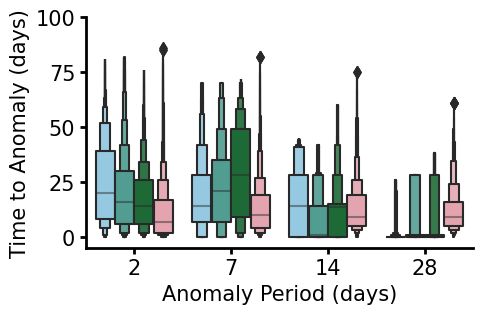

In [91]:
fig, ax = plt.subplots(figsize=(5,3))
sns.boxenplot(
    x='anomaly_freq',
    y='distance',
    hue='model',
    palette=palette['model'],
    hue_order=model_order,
    data=distance_df,
    ax=ax
)
fa.despine_thicken_axes(ax, fontsize=15)
ax.legend().remove()
ax.set_xlabel('Anomaly Period (days)')
ax.set_ylabel('Time to Anomaly (days)')
ax.set_ylim(-5,100)
distance_df.groupby(['model', 'anomaly_freq']).distance.describe().round(3)

<AxesSubplot: xlabel='metric', ylabel='value'>

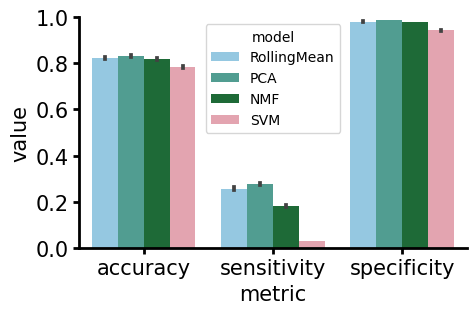

In [81]:
perf_melt = performance_df.melt(
    id_vars=groupby_cols + ['model'],
    value_vars=['accuracy', 'sensitivity', 'specificity'],
    var_name='metric'
)
perf_melt.loc[perf_melt.model == 'svm', 'model'] = 'SVM'
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(
    x='metric',
    y='value',
    hue='model',
    palette=palette['model'],
    hue_order=model_order,
    data=perf_melt,
    ax=ax
)
ax.set_ylim(0,1)
fa.despine_thicken_axes(ax, fontsize=15)

accuracy  sensitivity  specificity
model       history_type                                       
NMF         history_0_to_28     0.816        0.129        0.978
            history_all_28      0.818        0.150        0.980
PCA         history_0_to_28     0.812        0.126        0.976
            history_all_28      0.808        0.152        0.971
RollingMean history_0_to_28     0.822        0.259        0.981
            history_all_28      0.820        0.216        0.981
SVM         history_0_to_28     0.736        0.062        0.872
            history_all_28      0.756        0.061        0.897

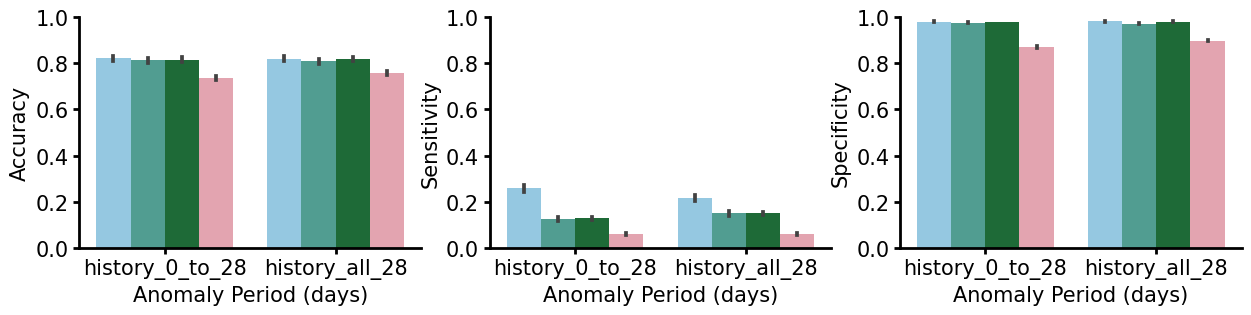

In [89]:
fig, axes = plt.subplots(figsize=(15,3), ncols=3)
exp = 'exp01'
criteria = (
            (performance_df.experiment == exp)
)
for i, metric in enumerate(['accuracy', 'sensitivity', 'specificity']):
    ax = axes[i]
    sns.barplot(
        x='history_type',
        y=metric,
        hue='model',
        palette=palette['model'],
        hue_order=model_order,
        data=performance_df[criteria],
        ax=ax
    )
    ax.set_ylim(0,1)
    ax.legend().remove()
    ax.set_xlabel('Anomaly Period (days)')
    ax.set_ylabel(metric.capitalize())
    fa.despine_thicken_axes(ax, fontsize=15)
performance_df[criteria].groupby(['model', 'history_type'])[['accuracy', 'sensitivity', 'specificity']].mean().round(3)

accuracy  sensitivity  specificity
model       anomaly_freq                                    
NMF         2                0.522        0.045        0.978
            7                0.869        0.125        0.983
            14               0.931        0.167        0.986
            28               0.944        0.222        0.969
PCA         2                0.504        0.027        0.960
            7                0.869        0.083        0.989
            14               0.917        0.167        0.970
            28               0.952        0.278        0.975
RollingMean 2                0.515        0.034        0.975
            7                0.876        0.167        0.985
            14               0.928        0.139        0.984
            28               0.967        0.611        0.979
SVM         2                0.494        0.120        0.852
            7                0.773        0.056        0.883
            14               0.840        0.034        0.897
            28               0.876        0.036        0.905

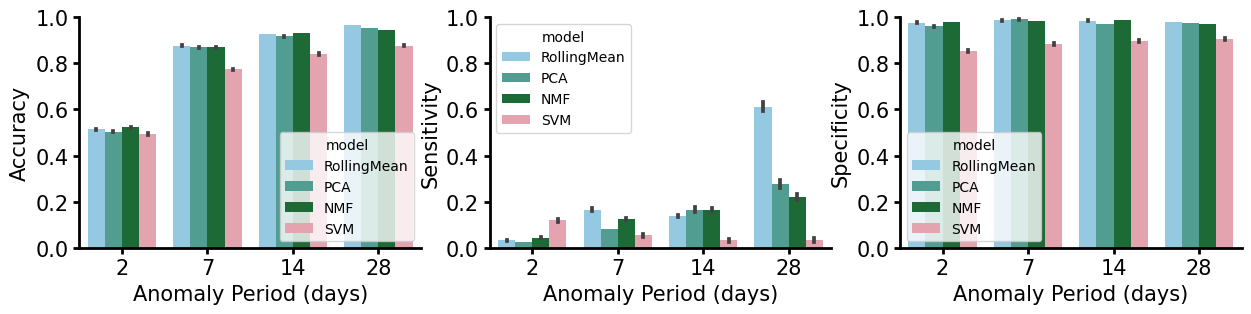

In [87]:
fig, axes = plt.subplots(figsize=(15,3), ncols=3)
exp = 'exp01'
criteria = (
            (performance_df.experiment == exp)
)
for i, metric in enumerate(['accuracy', 'sensitivity', 'specificity']):
    ax = axes[i]
    sns.barplot(
        x='anomaly_freq',
        y=metric,
        hue='model',
        palette=palette['model'],
        hue_order=model_order,
        data=performance_df[criteria],
        ax=ax
    )
    ax.set_ylim(0,1)
    ax.legend().remove()
    ax.set_xlabel('Anomaly Period (days)')
    ax.set_ylabel(metric.capitalize())
    fa.despine_thicken_axes(ax, fontsize=15)
performance_df[criteria].groupby(['model', 'anomaly_freq'])[['accuracy', 'sensitivity', 'specificity']].mean().round(3)

accuracy  sensitivity  specificity
model       n_features                                    
NMF         5              0.933        0.222        0.984
            10             0.930        0.222        0.980
            25             0.933        0.389        0.972
            100            0.948        0.500        0.980
PCA         5              0.915        0.167        0.968
            10             0.956        0.444        0.992
            25             0.967        0.611        0.992
            100            0.978        0.778        0.992
RollingMean 5              0.926        0.111        0.984
            10             0.922        0.278        0.968
            25             0.941        0.389        0.980
            100            0.970        0.667        0.992
SVM         5              0.851        0.033        0.909
            10             0.898        0.004        0.962
            25             0.926        0.001        0.992
            100            0.933        0.000        1.000

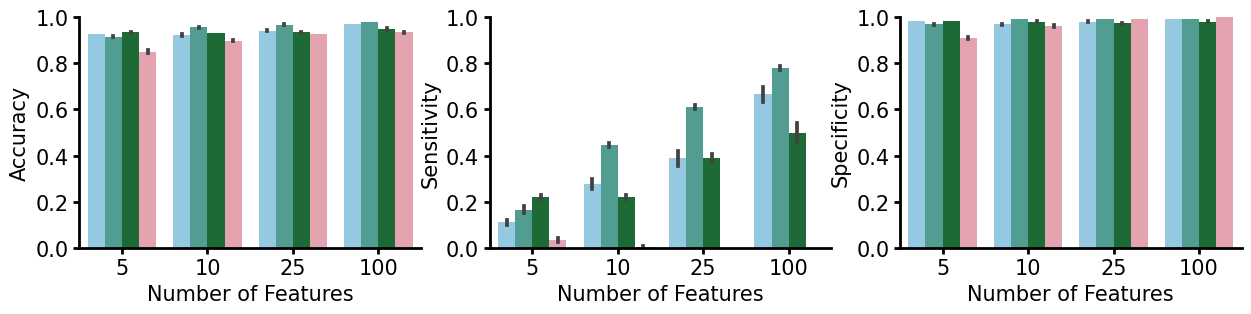

In [86]:
fig, axes = plt.subplots(figsize=(15,3), ncols=3)
exp = 'exp02'
across = 'n_features'
criteria = (
            (performance_df.experiment == exp) &
            (performance_df.anomaly_freq == 14)
)
for i, metric in enumerate(['accuracy', 'sensitivity', 'specificity']):
    ax = axes[i]
    sns.barplot(
        x=across,
        y=metric,
        hue='model',
        palette=palette['model'],
        hue_order=model_order,
        data=performance_df[criteria],
        ax=ax
    )
    ax.set_ylim(0,1)
    ax.legend().remove()
    ax.set_ylabel(metric.capitalize())
    ax.set_xlabel('Number of Features')
    fa.despine_thicken_axes(ax, fontsize=15)
performance_df[criteria].groupby(['model', across])[['accuracy', 'sensitivity', 'specificity']].mean().round(3)

accuracy  sensitivity  specificity
model       correlation_type                                    
NMF         Independent          0.930        0.333        0.972
            Linear               0.933        0.222        0.984
            Non-linear           0.930        0.278        0.976
PCA         Independent          0.967        0.611        0.992
            Linear               0.952        0.333        0.996
            Non-linear           0.952        0.389        0.992
RollingMean Independent          0.941        0.333        0.984
            Linear               0.919        0.167        0.972
            Non-linear           0.919        0.222        0.968
SVM         Independent          0.926        0.001        0.992
            Linear               0.893        0.007        0.956
            Non-linear           0.867        0.010        0.928

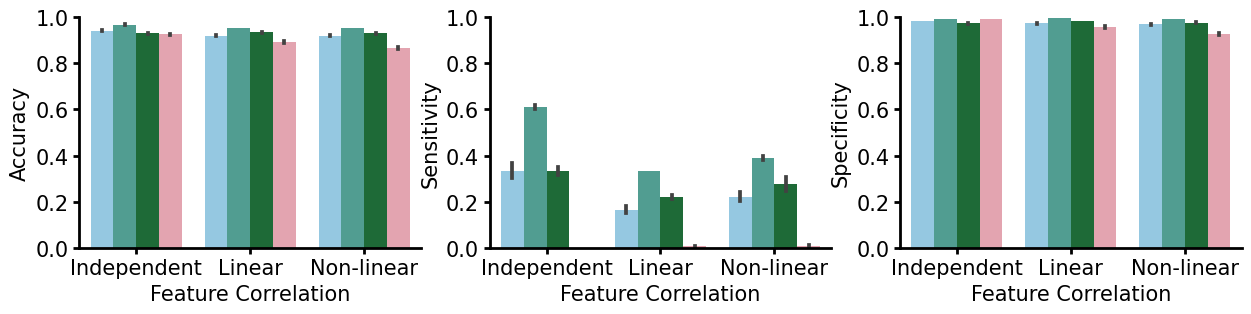

In [85]:
fig, axes = plt.subplots(figsize=(15,3), ncols=3)
exp = 'exp03'
across = 'correlation_type'
criteria = (
            (performance_df.experiment == exp) &
            (performance_df.anomaly_freq == 14)
)
for i, metric in enumerate(['accuracy', 'sensitivity', 'specificity']):
    ax = axes[i]
    sns.barplot(
        x=across,
        y=metric,
        hue='model',
        palette=palette['model'],
        hue_order=model_order,
        data=performance_df[criteria],
        ax=ax
    )
    ax.set_ylim(0,1)
    ax.legend().remove()
    ax.set_ylabel(metric.capitalize())
    ax.set_xlabel('Feature Correlation')
    fa.despine_thicken_axes(ax, fontsize=15)
performance_df[criteria].groupby(['model', across])[['accuracy', 'sensitivity', 'specificity']].mean().round(3)